## Importazione librerie

In [ ]:
# Importiamo le librerie
import sklearn
print("sklearn successfully imported")
import numpy as np
print("numpy successfully imported")
import pandas as pd
print("pandas successfully imported")
import matplotlib.pyplot as plt
print("matplotlib successfully imported")
import seaborn as sns
print("seaborn successfully imported")
from collections import Counter, defaultdict
print("collections successfully imported")
import re
print("re successfully imported")
import math
print("math successfully imported")

# Librerie per NLP
import nltk
print("nltk successfully imported")
import spacy
print("spacy successfully imported")
from spacy.cli import download
download("it_core_news_sm")
from nltk.corpus import stopwords
print("nltk.corpus successfully imported")
from nltk.tokenize import word_tokenize
print("nltk.tokenize successfully imported")

# Librerie per embeddings
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
print("sklearn - embedding - successfully imported")

# Visualizzazioni
from wordcloud import WordCloud
print("wordcloud successfully imported")
import plotly.express as px
import plotly.graph_objects as go
print("plotly successfully imported")

# Download dati NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
print("NLTK data successfully downloaded")

# Configurazione grafica
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Setup completato! Pronti per esplorare i Word Embeddings.")

sklearn successfully imported
numpy successfully imported
pandas successfully imported
matplotlib successfully imported
seaborn successfully imported
collections successfully imported
re successfully imported
math successfully imported
nltk successfully imported
spacy successfully imported
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
nltk.corpus successfully imported
nltk.tokenize successfully imported
sklearn - embedding - successfully imported
gensim successfully imported
wordcloud successfully imported
plotly successfully imported


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ARIANNABUSSOLA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ARIANNABUSSOLA\AppData\Roaming\nltk_data...


NLTK data successfully downloaded
✅ Setup completato! Pronti per esplorare i Word Embeddings.


[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARIANNABUSSOLA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 1: Normalizzazione del testo

In [5]:
testo = """
    Ciao!!! Come stai??? Io sto BENISSIMO 😊😊😊 
    Oggi è una giornata FANTASTICA!!! 
    Sto imparando l'AI... è incredibile!!! 
"""

# Stampo a video il testo originale
print("📝 TESTO ORIGINALE:")
print(repr(testo))
print("\n" + "="*50)
    
# Lowercasing
testo = testo.lower()
print('\n1. Lowercasing:')
print(repr(testo))

# Rimuovi punteggiatura ripetuta
testo = re.sub(r'[!]{2,}', '!', testo)
testo = re.sub(r'[?]{2,}', '?', testo)
testo = re.sub(r'[.]{2,}', '.', testo)
print('\n2. Rimozione punteggiatura ripetuta')
print(repr(testo))

# Rimuovi emoji (semplificato)
testo = re.sub(r'[😊😢😍🤔🚀📚🎯]', '', testo)
print('\n3. Rimozione emoji (semplificato)')
print(repr(testo))
    
# Rimuovi spazi extra e newline
testo = re.sub(r'\s+', ' ', testo.strip())
print('\n4. Rimozione spazi extra e new line')
print(repr(testo))
   


📝 TESTO ORIGINALE:
"\n    Ciao!!! Come stai??? Io sto BENISSIMO 😊😊😊 \n    Oggi è una giornata FANTASTICA!!! \n    Sto imparando l'AI... è incredibile!!! \n"


1. Lowercasing:
"\n    ciao!!! come stai??? io sto benissimo 😊😊😊 \n    oggi è una giornata fantastica!!! \n    sto imparando l'ai... è incredibile!!! \n"

2. Rimozione punteggiatura ripetuta
"\n    ciao! come stai? io sto benissimo 😊😊😊 \n    oggi è una giornata fantastica! \n    sto imparando l'ai. è incredibile! \n"

3. Rimozione emoji (semplificato)
"\n    ciao! come stai? io sto benissimo  \n    oggi è una giornata fantastica! \n    sto imparando l'ai. è incredibile! \n"

4. Rimozione spazi extra e new line
"ciao! come stai? io sto benissimo oggi è una giornata fantastica! sto imparando l'ai. è incredibile!"


## Step 2: Tokenizzazione

📝 TESTO ORIGINALE:
'ciao! come stai? io sto benissimo oggi è una giornata fantastica! sto imparando l'ai. è incredibile!'

1️⃣ TOKENIZZAZIONE SEMPLICE (split su spazi):
Token: ['ciao!', 'come', 'stai?', 'io', 'sto', 'benissimo', 'oggi', 'è', 'una', 'giornata', 'fantastica!', 'sto', 'imparando', "l'ai.", 'è', 'incredibile!']
Numero token: 16

2️⃣ TOKENIZZAZIONE NLTK (gestisce punteggiatura):
Token: ['ciao', '!', 'come', 'stai', '?', 'io', 'sto', 'benissimo', 'oggi', 'è', 'una', 'giornata', 'fantastica', '!', 'sto', 'imparando', "l'ai", '.', 'è', 'incredibile', '!']
Numero token: 21

3️⃣ TOKENIZZAZIONE SPACY (più avanzata):
Token: ['ciao', '!', 'come', 'stai', '?', 'io', 'sto', 'benissimo', 'oggi', 'è', 'una', 'giornata', 'fantastica', '!', 'sto', 'imparando', "l'", 'ai', '.', 'è', 'incredibile', '!']
Numero token: 22



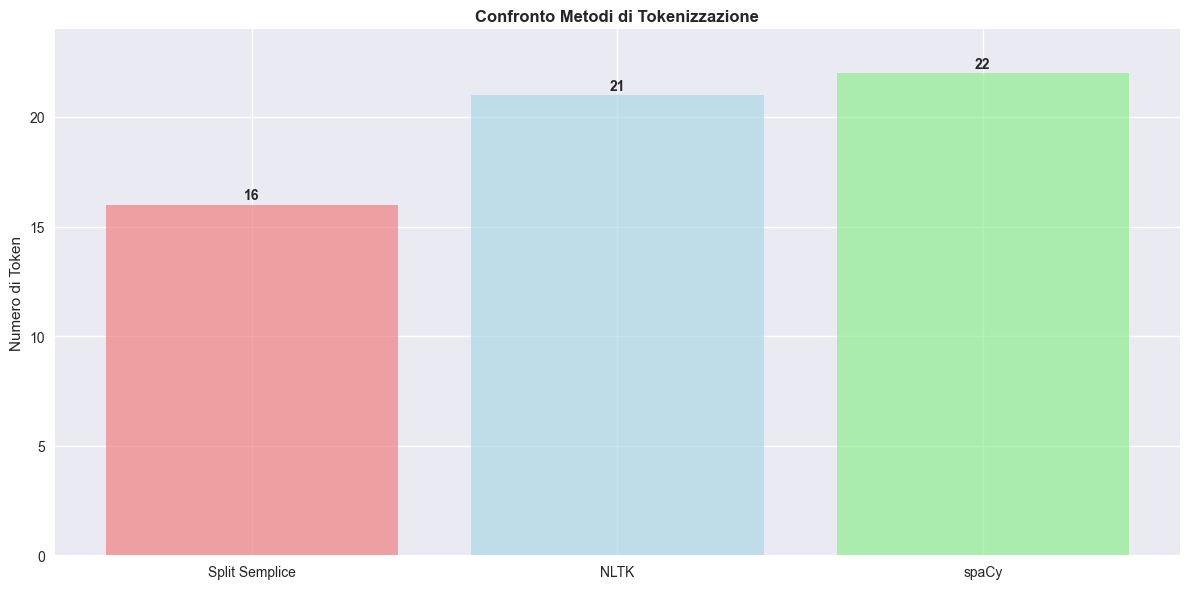

💡 Differenze chiave:
• Split semplice: veloce ma impreciso
• NLTK: gestisce meglio la punteggiatura
• spaCy: più intelligente, riconosce contrazioni


In [ ]:
testo_esempio = "ciao! come stai? io sto benissimo oggi è una giornata fantastica! sto imparando l'ai. è incredibile!"

# Stampo a video il testo originale
print("📝 TESTO ORIGINALE:")
print(f"'{testo_esempio}'\n")

# 1. Tokenizzazione semplice (split su spazi)
print("1️⃣ TOKENIZZAZIONE SEMPLICE (split su spazi):")
token_semplici = testo_esempio.split()
print(f"Token: {token_semplici}")
print(f"Numero token: {len(token_semplici)}\n")

# 2. Tokenizzazione con NLTK (più intelligente)
print("2️⃣ TOKENIZZAZIONE NLTK (gestisce punteggiatura):")
token_nltk = word_tokenize(testo_esempio, language='italian')
print(f"Token: {token_nltk}")
print(f"Numero token: {len(token_nltk)}\n")

# 3. Tokenizzazione con spaCy (ancora più avanzata)
print("3️⃣ TOKENIZZAZIONE SPACY (più avanzata):")
# Per la tokenizzazione in italiano useremo spaCy che è più accurato
nlp_it = spacy.load('it_core_news_sm')
doc = nlp_it(testo_esempio)
token_spacy = [token.text for token in doc]
print(f"Token: {token_spacy}")
print(f"Numero token: {len(token_spacy)}\n")


# CONFRONTO VISIVO DELLE TECNICHE
fig, ax = plt.subplots(figsize=(12, 6))
metodi = ['Split Semplice', 'NLTK', 'spaCy']
num_token = [len(token_semplici), len(token_nltk), len(token_spacy)]
colori = ['lightcoral', 'lightblue', 'lightgreen']
bars = ax.bar(metodi, num_token, color=colori, alpha=0.7)

# Aggiungi valori sopra le barre
for bar, num in zip(bars, num_token):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
            str(num), ha='center', va='bottom', fontweight='bold')

ax.set_ylabel('Numero di Token')
ax.set_title('Confronto Metodi di Tokenizzazione', fontweight='bold')
ax.set_ylim(0, max(num_token) + 2)

plt.tight_layout()
plt.show()

print("💡 Differenze chiave:")
print("• Split semplice: veloce ma impreciso")
print("• NLTK: gestisce meglio la punteggiatura")
print("• spaCy: più intelligente, riconosce contrazioni")

## Step 3: Stemming

✂️ ESEMPI DI STEMMING:

Parola Originale     Stem
         correre     corr
        correndo     corr
         correva     corr
        mangiare     mang
       mangiando     mang
         mangerà     mang
        mangiato     mang
        mangiava     mang
        studiare     stud
       studiando     stud
        studiava     stud
          studio     stud
     programmare programm
    programmando programm


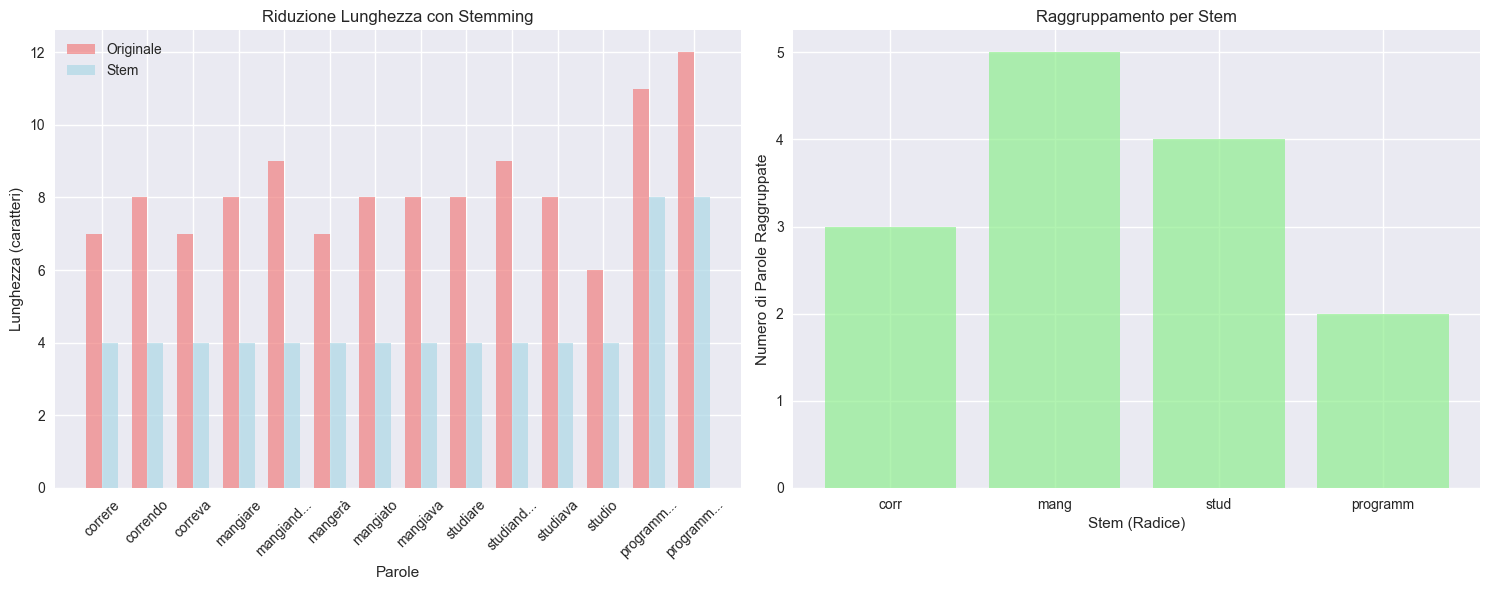

In [6]:
#Importo Libreria SnowballStemmer per l'italiano
from nltk.stem import SnowballStemmer
stemmer_it = SnowballStemmer('italian')

# Esempi di parole
parole_esempio = [
    'correre', 'correndo', 'correva',
    'mangiare', 'mangiando', 'mangerà', 'mangiato', 'mangiava',
    'studiare', 'studiando', 'studiava', 'studio', 
    'programmare', 'programmando'
]

print("✂️ ESEMPI DI STEMMING:\n")

# Creiamo un DataFrame per visualizzare meglio
risultati_stemming = []

for parola in parole_esempio:
    stem = stemmer_it.stem(parola)
    risultati_stemming.append({
        'Parola Originale': parola,
        'Stem': stem
    })

df_stemming = pd.DataFrame(risultati_stemming)
print(df_stemming.to_string(index=False))


## GRAFICI

# Visualizzazione delle lunghezze
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Grafico 1: Lunghezza parole originali vs stem
lunghezze_orig = [len(p) for p in parole_esempio]
lunghezze_stem = [len(stemmer_it.stem(p)) for p in parole_esempio]

x = np.arange(len(parole_esempio))
width = 0.35

ax1.bar(x - width/2, lunghezze_orig, width, label='Originale', alpha=0.7, color='lightcoral')
ax1.bar(x + width/2, lunghezze_stem, width, label='Stem', alpha=0.7, color='lightblue')

ax1.set_xlabel('Parole')
ax1.set_ylabel('Lunghezza (caratteri)')
ax1.set_title('Riduzione Lunghezza con Stemming')
ax1.set_xticks(x)
ax1.set_xticklabels([p[:8] + '...' if len(p) > 8 else p for p in parole_esempio], rotation=45)
ax1.legend()

# Grafico 2: Raggruppamento per radice
gruppi_stem = {}
for parola in parole_esempio:
    stem = stemmer_it.stem(parola)
    if stem not in gruppi_stem:
        gruppi_stem[stem] = []
    gruppi_stem[stem].append(parola)

stems = list(gruppi_stem.keys())
conteggi = [len(gruppi_stem[stem]) for stem in stems]

ax2.bar(stems, conteggi, color='lightgreen', alpha=0.7)
ax2.set_xlabel('Stem (Radice)')
ax2.set_ylabel('Numero di Parole Raggruppate')
ax2.set_title('Raggruppamento per Stem')

plt.tight_layout()
plt.show()

## Step 4: Stemming vs Lemmatizzazione

🌿 CONFRONTO STEMMING vs LEMMATIZZAZIONE:

📝 Frase: 'I bambini correvano felici nel parco e i cani giocavano a palla'

Analisi parola per parola:
Originale       Stem         Lemma           Uguali          Categoria grammaticale
----------------------------------------------------------------------
I               i            il              NO              DET       
bambini         bambin       bambino         NO              NOUN      
correvano       corr         esscorreve      NO              VERB      
felici          felic        felice          NO              ADJ       
nel             nel          in il           NO              ADP       
parco           parc         parco           NO              NOUN      
e               e            e               SI              CCONJ     
i               i            il              NO              DET       
cani            can          cane            NO              NOUN      
giocavano       gioc         giocavare       NO     

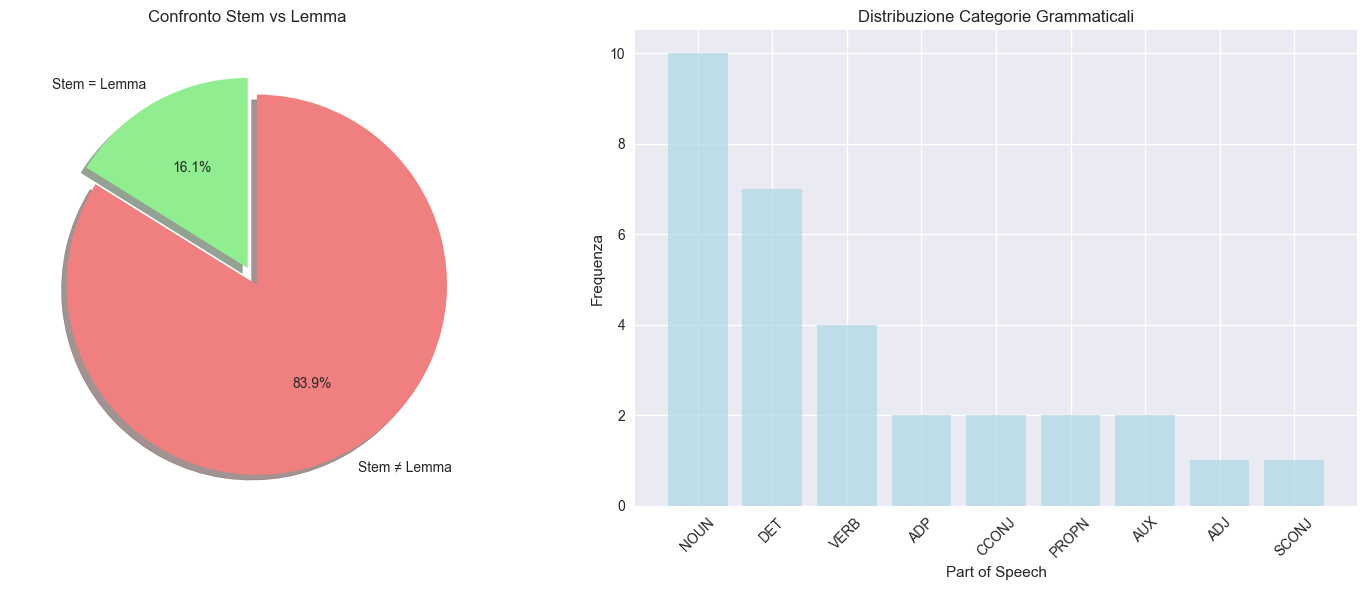

In [7]:
# Importo WordNet per la lemmatizzazione
from nltk.stem import WordNetLemmatizer

# Per la tokenizzazione in italiano useremo spaCy che è più accurato
nlp_it = spacy.load('it_core_news_sm')

# Esempi di frasi
frasi_esempio = [
    "I bambini correvano felici nel parco e i cani giocavano a palla",
    "Le ragazze studiavano matematica mentre i ragazzi vedevano un film",
    "Arianna è una lavoratrice e Giovanni è uno studente"
]

print("🌿 CONFRONTO STEMMING vs LEMMATIZZAZIONE:\n")

risultati_confronto = []

for frase in frasi_esempio:
    print(f"📝 Frase: '{frase}'")
    
    # Tokenizzazione e lemmatizzazione (lo fa in automatico e salva in text il token, e in lemma_ il lemma)
    doc = nlp_it(frase)
    
    print("\nAnalisi parola per parola:")
    # intestazioni colonne
    print(f"{'Originale':<15} {'Stem':<12} {'Lemma':<15} {'Uguali':<15} {'Categoria grammaticale':<10}")
    print("-" * 70)
    
    for token in doc:
        if not token.is_punct and not token.is_space:
            originale = token.text

            # Recupero lo stem
            stem = stemmer_it.stem(originale.lower())

            # Recupero il lemma
            lemma = token.lemma_

            # Recupero informazioni sulla categoria grammaticale
            pos = token.pos_
            
            # Check uguaglianza stem e lemma
            if stem != lemma:
                spiegazione = "NO"
            else:
                spiegazione = "SI"
            
            print(f"{originale:<15} {stem:<12} {lemma:<15} {spiegazione:<15} {pos:<10}")
            
            risultati_confronto.append({
                'originale': originale,
                'stem': stem,
                'lemma': lemma,
                'pos': pos
            })
    
    print("\n" + "="*70 + "\n")


## CONFRONTO VISIVO 

# Analisi statistica
df_confronto = pd.DataFrame(risultati_confronto)

# Contiamo le differenze
uguali = sum(df_confronto['stem'] == df_confronto['lemma'])
diversi = len(df_confronto) - uguali

# Visualizzazione
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Grafico 1: Confronto accuratezza
labels = ['Stem = Lemma', 'Stem ≠ Lemma']
sizes = [uguali, diversi]
colors = ['lightgreen', 'lightcoral']
explode = (0, 0.1)

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title('Confronto Stem vs Lemma')

# Grafico 2: Distribuzione per POS (Part of Speech)
pos_counts = df_confronto['pos'].value_counts()
ax2.bar(pos_counts.index, pos_counts.values, color='lightblue', alpha=0.7)
ax2.set_xlabel('Part of Speech')
ax2.set_ylabel('Frequenza')
ax2.set_title('Distribuzione Categorie Grammaticali')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Step 5: Rimozione stop words

📚 STOP WORDS ITALIANE (279 totali):

Prime 20 stop words:
['all', 'si', 'lui', 'saresti', 'dove', 'al', 'avevamo', 'ebbe', 'era', 'avessero', 'eravamo', 'fosti', 'avute', 'dalla', 'ebbero', 'avevate', 'avessimo', 'fecero', 'siamo', 'tue']

📝 TESTO ORIGINALE:
L'intelligenza artificiale è una tecnologia che sta rivoluzionando il mondo.
Molte aziende stanno investendo in questa tecnologia per migliorare i loro prodotti.
Gli algoritmi di machine learning possono analizzare grandi quantità di dati.

🔤 TOKENS ORIGINALI (34):
["l'", 'intelligenza', 'artificiale', 'è', 'una', 'tecnologia', 'che', 'sta', 'rivoluzionando', 'il', 'mondo', 'molte', 'aziende', 'stanno', 'investendo', 'in', 'questa', 'tecnologia', 'per', 'migliorare', 'i', 'loro', 'prodotti', 'gli', 'algoritmi', 'di', 'machine', 'learning', 'possono', 'analizzare', 'grandi', 'quantità', 'di', 'dati']

✨ TOKENS SENZA STOP WORDS (20):
["l'", 'intelligenza', 'artificiale', 'tecnologia', 'rivoluzionando', 'mondo', 'molte', 'aziende', 'i

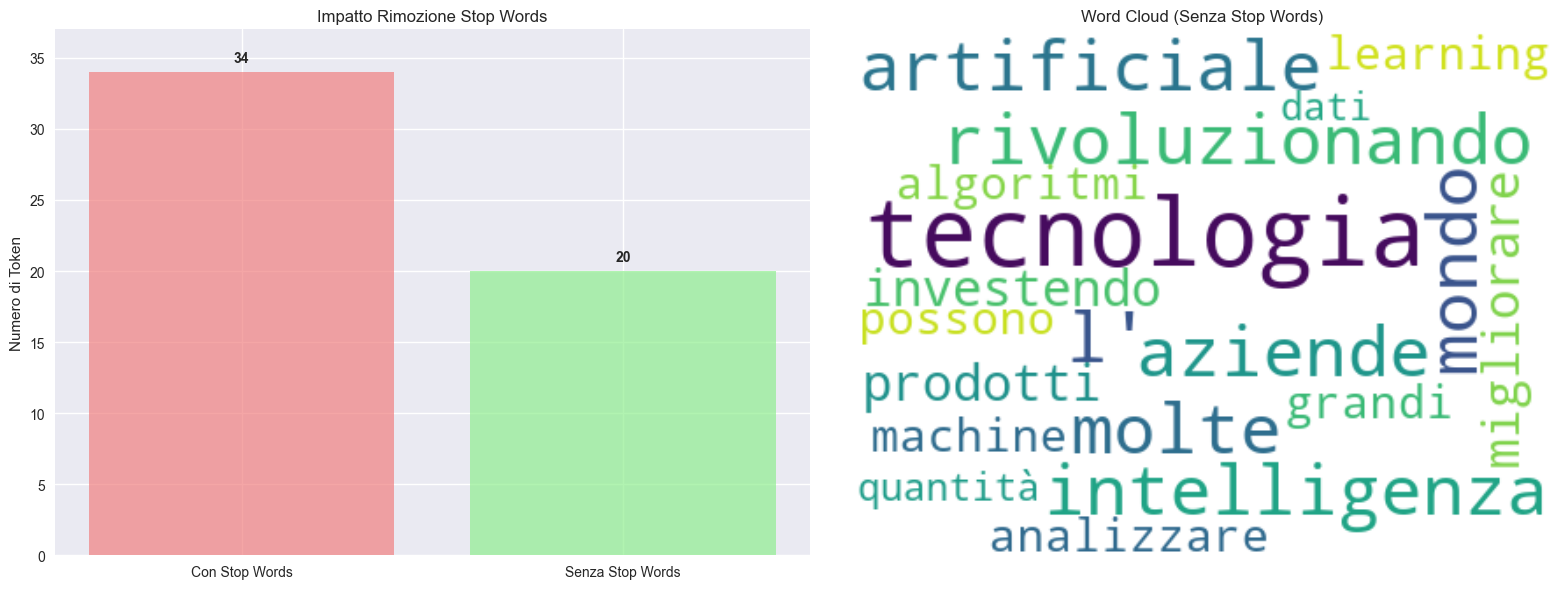


🚫 STOP WORDS RIMOSSE (14 occorrenze):
   'di': 2 volte
   'è': 1 volte
   'una': 1 volte
   'che': 1 volte
   'sta': 1 volte
   'il': 1 volte
   'stanno': 1 volte
   'in': 1 volte
   'questa': 1 volte
   'per': 1 volte
   'i': 1 volte
   'loro': 1 volte
   'gli': 1 volte


In [14]:
# Importo la libreria per la rimozione delle stopwords italiane
from nltk.corpus import stopwords
stop_words_it = set(stopwords.words('italian'))

# Stampo a video quante sono le stopwords italiane e visualizzo le prime 20

print(f"📚 STOP WORDS ITALIANE ({len(stop_words_it)} totali):\n")
print("Prime 20 stop words:")
print(list(stop_words_it)[:20])

# Esempio pratico
testo_esempio = """
L'intelligenza artificiale è una tecnologia che sta rivoluzionando il mondo.
Molte aziende stanno investendo in questa tecnologia per migliorare i loro prodotti.
Gli algoritmi di machine learning possono analizzare grandi quantità di dati.
"""

print("\n📝 TESTO ORIGINALE:")
print(testo_esempio.strip())

# 1. Tokenizzazione
doc = nlp_it(testo_esempio)

# 2. Rimozione punti e spazi
tokens_originali = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]

# STAMPO I TOKEN ORIGINALI
print(f"\n🔤 TOKENS ORIGINALI ({len(tokens_originali)}):")
print(tokens_originali)

# 3. Rimozione stopwords
tokens_senza_stop = [token for token in tokens_originali if token not in stop_words_it]

# STAMPO I TOKEN SENZA LE STOPWORDS
print(f"\n✨ TOKENS SENZA STOP WORDS ({len(tokens_senza_stop)}):")
print(tokens_senza_stop)

# Analisi dell'impatto
riduzione_percentuale = (1 - len(tokens_senza_stop) / len(tokens_originali)) * 100

print(f"\n📊 RIDUZIONE: {riduzione_percentuale:.1f}%")


# CONFRONTO VISIVO

# Visualizzazione
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Grafico 1: Confronto lunghezze
categorie = ['Con Stop Words', 'Senza Stop Words']
lunghezze = [len(tokens_originali), len(tokens_senza_stop)]
colori = ['lightcoral', 'lightgreen']

bars = ax1.bar(categorie, lunghezze, color=colori, alpha=0.7)
for bar, lunghezza in zip(bars, lunghezze):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(lunghezza), ha='center', va='bottom', fontweight='bold')

ax1.set_ylabel('Numero di Token')
ax1.set_title('Impatto Rimozione Stop Words')
ax1.set_ylim(0, max(lunghezze) + 3)

# Grafico 2: Word Cloud delle parole rimanenti
if tokens_senza_stop:  # Solo se ci sono token
    testo_pulito = ' '.join(tokens_senza_stop)
    wordcloud = WordCloud(width=400, height=300, background_color='white', 
                         colormap='viridis').generate(testo_pulito)
    
    ax2.imshow(wordcloud, interpolation='bilinear')
    ax2.axis('off')
    ax2.set_title('Word Cloud (Senza Stop Words)')

plt.tight_layout()
plt.show()

# Identifichiamo le stop words rimosse
stop_words_rimosse = [token for token in tokens_originali if token in stop_words_it]
stop_words_freq = Counter(stop_words_rimosse)

print(f"\n🚫 STOP WORDS RIMOSSE ({len(stop_words_rimosse)} occorrenze):")
for parola, freq in stop_words_freq.most_common():
    print(f"   '{parola}': {freq} volte")

## PIPELINE COMPLETA DI PRE-ELABORAZIONE DEL TESTO

In [15]:
# Pipeline completa di pre-elaborazione
class PipelinePreelaborazione:
    def __init__(self, lingua='italian'):
        """Inizializza la pipeline"""

        # Definisco le librerie che utilizzerò
        self.lingua = lingua
        self.nlp = spacy.load('it_core_news_sm' if lingua == 'italian' else 'en_core_web_sm')
        self.stemmer = SnowballStemmer(lingua)
        self.stop_words = set(stopwords.words(lingua))
        
        # Creo struttura per salvarmi le statistiche
        self.stats = {
            'testi_processati': 0,
            'token_originali': 0,
            'token_finali': 0,
            'stop_words_rimosse': 0
        }

    # funzione che applica la normalizzazione del testo
    def pulisci_testo(self, testo):
        """Pulizia base del testo"""
        # Converti in minuscolo
        testo = testo.lower()
        
        # Rimuovi URL
        testo = re.sub(r'http\S+|www\S+|https\S+', '', testo)
        
        # Rimuovi email
        testo = re.sub(r'\S+@\S+', '', testo)
        
        # Rimuovi hashtag e mention
        testo = re.sub(r'#\w+|@\w+', '', testo)
        
        # Rimuovi numeri (opzionale)
        testo = re.sub(r'\d+', '', testo)
        
        # Rimuovi punteggiatura extra
        testo = re.sub(r'[^\w\s]', ' ', testo)
        
        # Rimuovi spazi multipli
        testo = re.sub(r'\s+', ' ', testo).strip()
        
        return testo

    # funzione per tokenizzazione + lemmatizzazione
    def tokenizza_e_lemmatizza(self, testo):
        """Tokenizzazione e lemmatizzazione"""

        # creo i token
        doc = self.nlp(testo)
        tokens = []

        # applico la lemmatizzazione (solo per i token che non sono punteggiatura, spazi o minori di 2 lettere) 
        for token in doc:
            if not token.is_punct and not token.is_space and len(token.text) > 2:
                # spaCy non è ottimale nella lemmatizzazione per i pronomi
                # e per questi ultimi mette la stringa '-PRON-' nel campo lemma_
                # quindi prendiamo il lemma per tutti i token che non sono pronomi
                # mentre per i pronomi prendiamo lo stem
                if token.lemma_ != '-PRON-': 
                    tokens.append(token.lemma_)
                else:
                    tokens.append(self.stemmer.stem(token.text))
        
        return tokens
    
    def rimuovi_stop_words(self, tokens):
        """Rimuove stop words"""
        tokens_filtrati = []
        stop_words_rimosse = 0
        
        for token in tokens:
            if token not in self.stop_words:
                tokens_filtrati.append(token)
            else:
                stop_words_rimosse += 1
        
        self.stats['stop_words_rimosse'] += stop_words_rimosse
        return tokens_filtrati

    # processa un singolo testo con l'intera pipeline di pre-elaborazione
    def processa_testo(self, testo, rimuovi_stop=True, min_lunghezza=2):
        """Pipeline completa"""
        # Step 1: Pulizia
        testo_pulito = self.pulisci_testo(testo)
        
        # Step 2: Tokenizzazione e lemmatizzazione
        tokens = self.tokenizza_e_lemmatizza(testo_pulito)
        
        # Aggiorna statistiche
        self.stats['token_originali'] += len(tokens)
        
        # Step 3: Rimozione stop words (opzionale)
        if rimuovi_stop:
            tokens = self.rimuovi_stop_words(tokens)
        
        # Step 4: Filtra per lunghezza minima
        tokens = [token for token in tokens if len(token) >= min_lunghezza]
        
        # Aggiorna statistiche
        self.stats['token_finali'] += len(tokens)
        self.stats['testi_processati'] += 1
        
        return tokens

    def processa_lista_testi(self, testi, **kwargs):
        """Processa una lista di testi"""
        risultati = []
        for testo in testi:
            tokens = self.processa_testo(testo, **kwargs)
            risultati.append(tokens)
        return risultati

    
    def get_statistiche(self):
        """Restituisce statistiche di elaborazione"""
        stats = self.stats.copy()
        if stats['token_originali'] > 0:
            stats['riduzione_percentuale'] = (
                1 - stats['token_finali'] / stats['token_originali']
            ) * 100
        else:
            stats['riduzione_percentuale'] = 0
        return stats

# Test della pipeline
print("🧹 TEST PIPELINE COMPLETA\n")

# Testi di esempio
testi_test = [
    "Ciao! Come stai? Io sto imparando l'AI e mi piace molto! 😊",
    "L'intelligenza artificiale sta rivoluzionando il mondo della tecnologia.",
    "I modelli di machine learning possono analizzare enormi quantità di dati.",
    "Visita il mio sito https://esempio.com per saperne di più! #AI #Tech",
    "Gli algoritmi di deep learning sono molto potenti ma richiedono molti dati."
]

# Inizializza pipeline
pipeline = PipelinePreelaborazione()

print("📝 TESTI ORIGINALI:")
for i, testo in enumerate(testi_test, 1):
    print(f"{i}. {testo}")

print("\n" + "="*70)

# Processa i testi
risultati = pipeline.processa_lista_testi(testi_test)

print("\n✨ RISULTATI ELABORAZIONE:")
for i, (originale, tokens) in enumerate(zip(testi_test, risultati), 1):
    print(f"\n{i}. Originale: {originale}")
    print(f"   Tokens: {tokens}")
    print(f"   Numero tokens: {len(tokens)}")

# Statistiche
stats = pipeline.get_statistiche()
print("\n📊 STATISTICHE ELABORAZIONE:")
for chiave, valore in stats.items():
    if 'percentuale' in chiave:
        print(f"   {chiave.replace('_', ' ').title()}: {valore:.1f}%")
    else:
        print(f"   {chiave.replace('_', ' ').title()}: {valore}")

🧹 TEST PIPELINE COMPLETA

📝 TESTI ORIGINALI:
1. Ciao! Come stai? Io sto imparando l'AI e mi piace molto! 😊
2. L'intelligenza artificiale sta rivoluzionando il mondo della tecnologia.
3. I modelli di machine learning possono analizzare enormi quantità di dati.
4. Visita il mio sito https://esempio.com per saperne di più! #AI #Tech
5. Gli algoritmi di deep learning sono molto potenti ma richiedono molti dati.


✨ RISULTATI ELABORAZIONE:

1. Originale: Ciao! Come stai? Io sto imparando l'AI e mi piace molto! 😊
   Tokens: ['ciao', 'stare', 'stare', 'imparare', 'piacere', 'molto']
   Numero tokens: 6

2. Originale: L'intelligenza artificiale sta rivoluzionando il mondo della tecnologia.
   Tokens: ['intelligenza', 'artificiale', 'stare', 'rivoluzionare', 'mondo', 'di il', 'tecnologia']
   Numero tokens: 7

3. Originale: I modelli di machine learning possono analizzare enormi quantità di dati.
   Tokens: ['modello', 'machine', 'learning', 'potere', 'analizzare', 'enorme', 'quantità', 'dato']

## Extra: Testi da diverse fonti

📊 ANALISI TESTI REALI DA DIVERSE FONTI

📂 CATEGORIA: SOCIAL MEDIA
----------------------------------------------------------------------------------------------------
Testi processati: 3
1. OMG! L'AI è incredibile!!! 🤖 Chi altro sta imparando il machine learning? #AI #Tech #Amazing
2. Appena finito un corso su Python! 🐍 Ora voglio imparare il deep learning 💪 #coding #python
3. ChatGPT ha cambiato tutto!!! Non posso credere a quanto sia potente 😱 #ChatGPT #OpenAI

Token totali: 22
Vocabolario unico: 20
Riduzione: 15.4%

Top 5 parole più frequenti:
   'imparare': 2 volte
   'learning': 2 volte
   'omge': 1 volte
   'incredibile': 1 volte
   'altro': 1 volte


📂 CATEGORIA: ARTICOLI SCIENTIFICI
----------------------------------------------------------------------------------------------------
Testi processati: 3
1. L'intelligenza artificiale rappresenta una delle più significative rivoluzioni tecnologiche del XXI secolo.
2. I modelli transformer hanno dimostrato prestazioni superiori in n

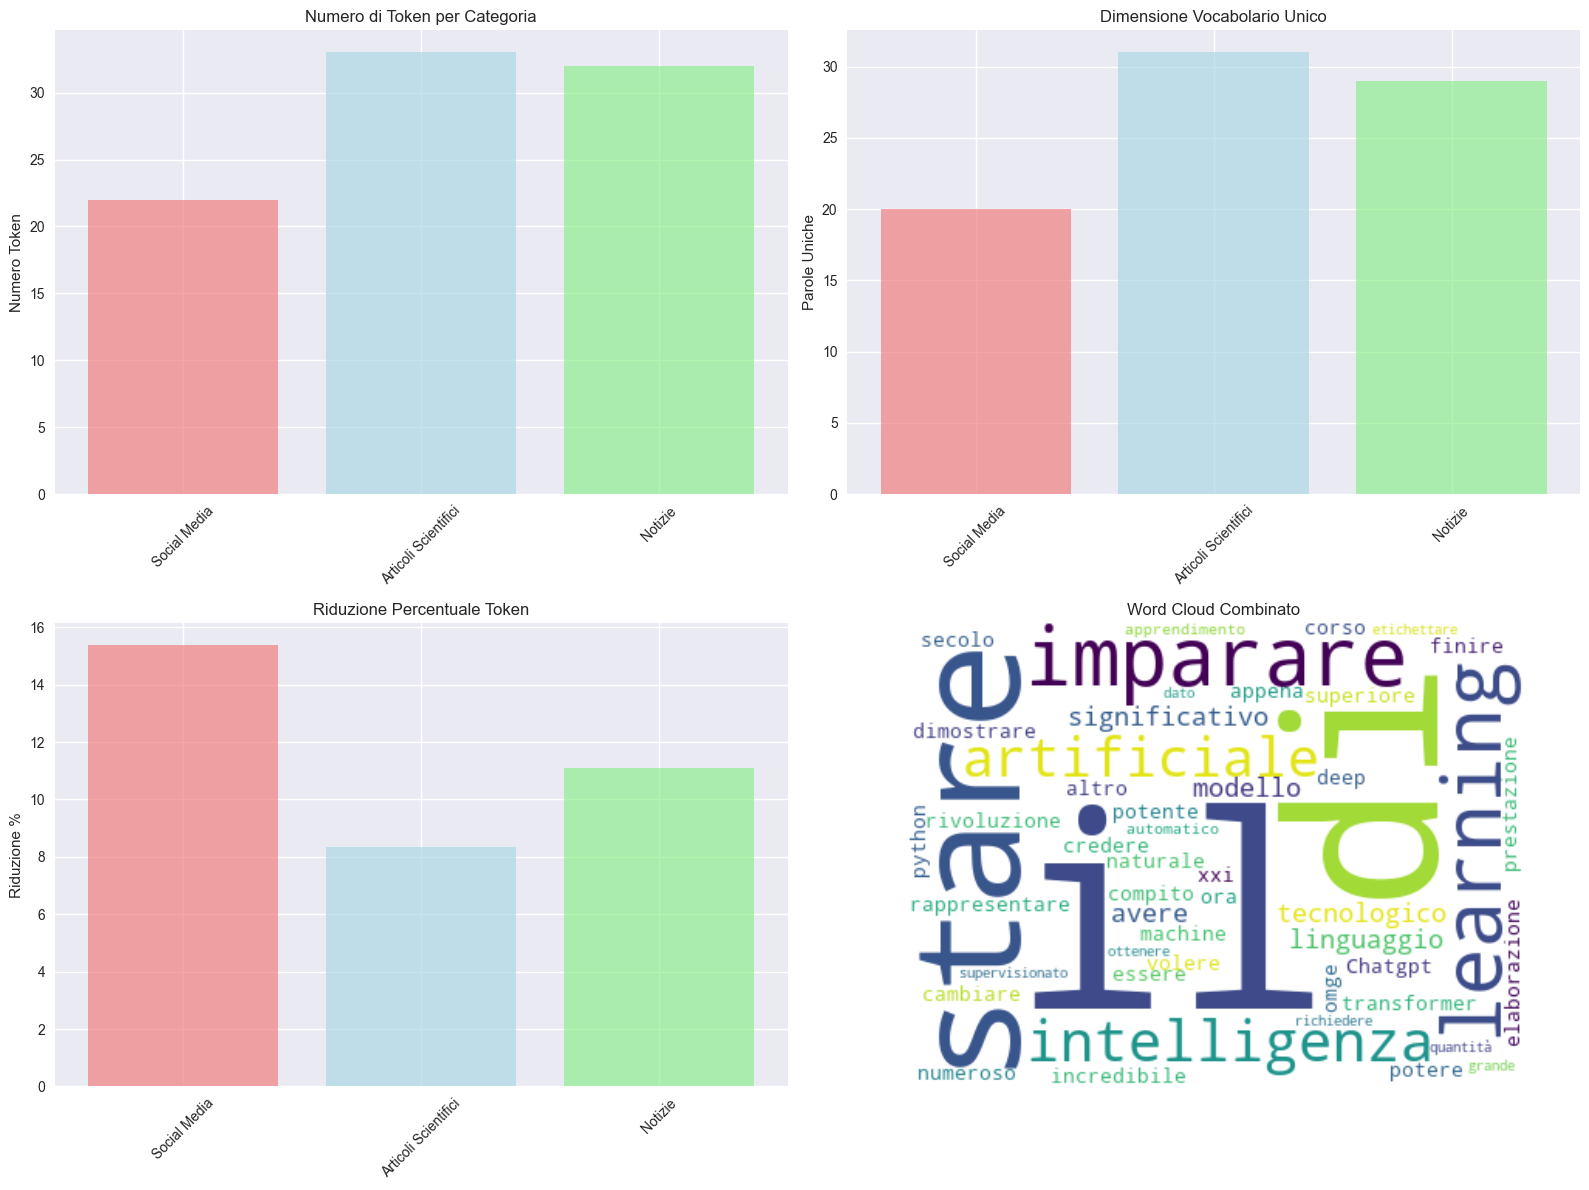

In [10]:
# Simuliamo testi da diverse fonti
testi_reali = {
    'Social Media': [
        "OMG! L'AI è incredibile!!! 🤖 Chi altro sta imparando il machine learning? #AI #Tech #Amazing",
        "Appena finito un corso su Python! 🐍 Ora voglio imparare il deep learning 💪 #coding #python",
        "ChatGPT ha cambiato tutto!!! Non posso credere a quanto sia potente 😱 #ChatGPT #OpenAI"
    ],
    'Articoli Scientifici': [
        "L'intelligenza artificiale rappresenta una delle più significative rivoluzioni tecnologiche del XXI secolo.",
        "I modelli transformer hanno dimostrato prestazioni superiori in numerosi compiti di elaborazione del linguaggio naturale.",
        "L'apprendimento automatico supervisionato richiede grandi quantità di dati etichettati per ottenere risultati ottimali."
    ],
    'Notizie': [
        "Le aziende tecnologiche stanno investendo miliardi di dollari nello sviluppo dell'intelligenza artificiale.",
        "Il nuovo modello di AI di Google ha superato tutti i benchmark precedenti nella comprensione del linguaggio.",
        "Gli esperti prevedono che l'AI avrà un impatto significativo sul mercato del lavoro nei prossimi anni."
    ]
}

print("📊 ANALISI TESTI REALI DA DIVERSE FONTI\n")

# Analizza ogni categoria
risultati_analisi = {}

for categoria, testi in testi_reali.items():
    print(f"📂 CATEGORIA: {categoria.upper()}")
    print("-" * 100)
    
    # Nuova pipeline per ogni categoria
    pipeline_cat = PipelinePreelaborazione()
    
    # Processa i testi
    tokens_categoria = pipeline_cat.processa_lista_testi(testi)
    
    # Combina tutti i token
    tutti_token = [token for tokens in tokens_categoria for token in tokens]
    
    # Statistiche
    stats_cat = pipeline_cat.get_statistiche()
    freq_parole = Counter(tutti_token)
    
    risultati_analisi[categoria] = {
        'tokens': tutti_token,
        'stats': stats_cat,
        'top_words': freq_parole.most_common(10)
    }
    
    print(f"Testi processati: {stats_cat['testi_processati']}")

    for i, frase in enumerate(testi_reali[categoria], 1):
        print(f"{i}. {frase}")
    
    print(f"\nToken totali: {len(tutti_token)}")
    print(f"Vocabolario unico: {len(set(tutti_token))}")
    print(f"Riduzione: {stats_cat['riduzione_percentuale']:.1f}%")
    
    print(f"\nTop 5 parole più frequenti:")
    for parola, freq in freq_parole.most_common(5):
        print(f"   '{parola}': {freq} volte")
    
    print("\n" + "="*100 + "\n")

# Visualizzazione comparativa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Grafico 1: Numero di token per categoria
categorie = list(risultati_analisi.keys())
num_tokens = [len(risultati_analisi[cat]['tokens']) for cat in categorie]

axes[0,0].bar(categorie, num_tokens, color=['lightcoral', 'lightblue', 'lightgreen'], alpha=0.7)
axes[0,0].set_title('Numero di Token per Categoria')
axes[0,0].set_ylabel('Numero Token')
axes[0,0].tick_params(axis='x', rotation=45)

# Grafico 2: Dimensione vocabolario
vocab_sizes = [len(set(risultati_analisi[cat]['tokens'])) for cat in categorie]

axes[0,1].bar(categorie, vocab_sizes, color=['lightcoral', 'lightblue', 'lightgreen'], alpha=0.7)
axes[0,1].set_title('Dimensione Vocabolario Unico')
axes[0,1].set_ylabel('Parole Uniche')
axes[0,1].tick_params(axis='x', rotation=45)

# Grafico 3: Riduzione percentuale
riduzioni = [risultati_analisi[cat]['stats']['riduzione_percentuale'] for cat in categorie]

axes[1,0].bar(categorie, riduzioni, color=['lightcoral', 'lightblue', 'lightgreen'], alpha=0.7)
axes[1,0].set_title('Riduzione Percentuale Token')
axes[1,0].set_ylabel('Riduzione %')
axes[1,0].tick_params(axis='x', rotation=45)

# Grafico 4: Word cloud combinato
tutti_token_combinati = []
for cat in categorie:
    tutti_token_combinati.extend(risultati_analisi[cat]['tokens'])

if tutti_token_combinati:
    testo_combinato = ' '.join(tutti_token_combinati)
    wordcloud = WordCloud(width=400, height=300, background_color='white',
                         colormap='viridis', max_words=50).generate(testo_combinato)
    
    axes[1,1].imshow(wordcloud, interpolation='bilinear')
    axes[1,1].axis('off')
    axes[1,1].set_title('Word Cloud Combinato')

plt.tight_layout()
plt.show()

## VALUTAZIONE metriche di pre-elaborazione

🔍 VALUTAZIONE QUALITÀ PRE-ELABORAZIONE

📊 METRICHE DI QUALITÀ:
   Riduzione Token: 33.1%
   Riduzione Vocabolario: 38.8%
   Lunghezza Media Token: 7.77
   Lunghezza Media Testo: 9.67
   Std Lunghezza Testo: 1.94


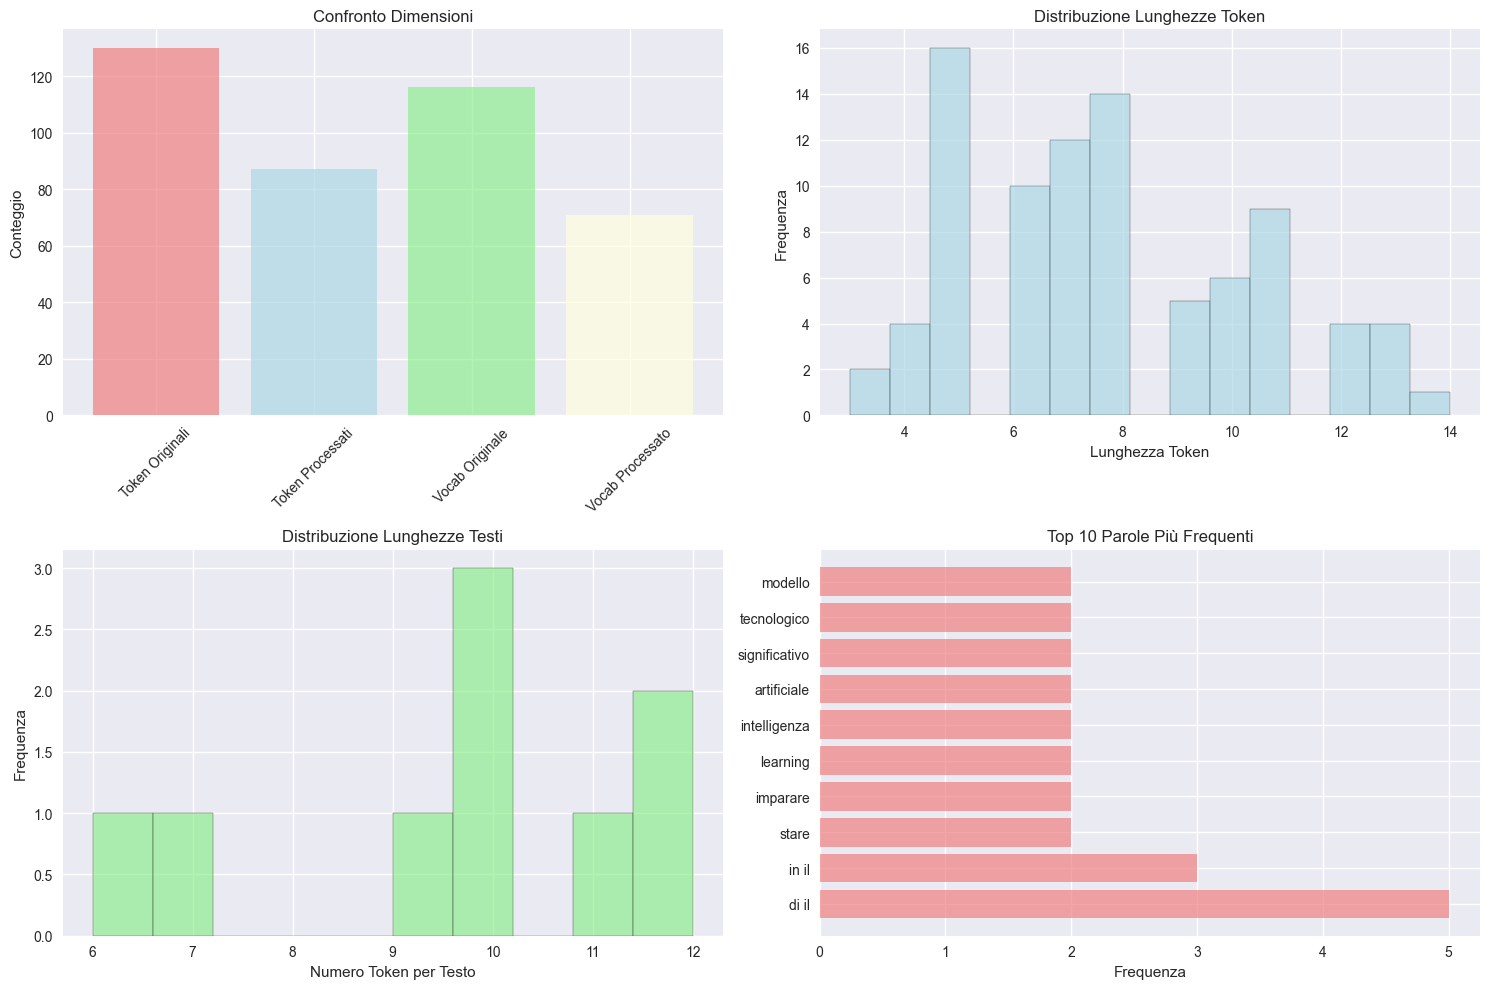

In [16]:
# Metriche di valutazione della pre-elaborazione
def valuta_preelaborazione(testi_originali, testi_processati):
    """Valuta la qualità della pre-elaborazione"""
    
    metriche = {}
    
    # 1. Riduzione dimensionalità
    token_orig = sum(len(testo.split()) for testo in testi_originali)
    token_proc = sum(len(tokens) for tokens in testi_processati)
    
    metriche['riduzione_token'] = (1 - token_proc / token_orig) * 100
    
    # 2. Diversità vocabolario
    vocab_orig = set()
    for testo in testi_originali:
        vocab_orig.update(testo.lower().split())
    
    vocab_proc = set()
    for tokens in testi_processati:
        vocab_proc.update(tokens)
    
    metriche['riduzione_vocabolario'] = (1 - len(vocab_proc) / len(vocab_orig)) * 100
    
    # 3. Lunghezza media token
    if token_proc > 0:
        lunghezze_proc = [len(token) for tokens in testi_processati for token in tokens]
        metriche['lunghezza_media_token'] = np.mean(lunghezze_proc)
    else:
        metriche['lunghezza_media_token'] = 0
    
    # 4. Distribuzione lunghezze
    lunghezze_testi = [len(tokens) for tokens in testi_processati]
    metriche['lunghezza_media_testo'] = np.mean(lunghezze_testi)
    metriche['std_lunghezza_testo'] = np.std(lunghezze_testi)
    
    return metriche

# Test con i nostri dati
print("🔍 VALUTAZIONE QUALITÀ PRE-ELABORAZIONE\n")

# Prepara i dati
tutti_testi_orig = []
tutti_testi_proc = []

for categoria, testi in testi_reali.items():
    tutti_testi_orig.extend(testi)
    
    pipeline_val = PipelinePreelaborazione()
    tokens_proc = pipeline_val.processa_lista_testi(testi)
    tutti_testi_proc.extend(tokens_proc)

# Calcola metriche
metriche = valuta_preelaborazione(tutti_testi_orig, tutti_testi_proc)

print("📊 METRICHE DI QUALITÀ:")
for nome, valore in metriche.items():
    if 'riduzione' in nome or 'percentuale' in nome:
        print(f"   {nome.replace('_', ' ').title()}: {valore:.1f}%")
    else:
        print(f"   {nome.replace('_', ' ').title()}: {valore:.2f}")

# Visualizzazione metriche
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Confronto dimensioni
dimensioni = ['Token Originali', 'Token Processati', 'Vocab Originale', 'Vocab Processato']
valori = [
    sum(len(testo.split()) for testo in tutti_testi_orig),
    sum(len(tokens) for tokens in tutti_testi_proc),
    len(set(token.lower() for testo in tutti_testi_orig for token in testo.split())),
    len(set(token for tokens in tutti_testi_proc for token in tokens))
]

colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow']
ax1.bar(dimensioni, valori, color=colors, alpha=0.7)
ax1.set_title('Confronto Dimensioni')
ax1.set_ylabel('Conteggio')
ax1.tick_params(axis='x', rotation=45)

# 2. Distribuzione lunghezze token
lunghezze_token = [len(token) for tokens in tutti_testi_proc for token in tokens]
ax2.hist(lunghezze_token, bins=15, alpha=0.7, color='lightblue', edgecolor='black')
ax2.set_title('Distribuzione Lunghezze Token')
ax2.set_xlabel('Lunghezza Token')
ax2.set_ylabel('Frequenza')

# 3. Distribuzione lunghezze testi
lunghezze_testi = [len(tokens) for tokens in tutti_testi_proc]
ax3.hist(lunghezze_testi, bins=10, alpha=0.7, color='lightgreen', edgecolor='black')
ax3.set_title('Distribuzione Lunghezze Testi')
ax3.set_xlabel('Numero Token per Testo')
ax3.set_ylabel('Frequenza')

# 4. Top parole più frequenti
tutti_token_finali = [token for tokens in tutti_testi_proc for token in tokens]
freq_finali = Counter(tutti_token_finali)
top_10 = freq_finali.most_common(10)

parole, frequenze = zip(*top_10)
ax4.barh(range(len(parole)), frequenze, color='lightcoral', alpha=0.7)
ax4.set_yticks(range(len(parole)))
ax4.set_yticklabels(parole)
ax4.set_title('Top 10 Parole Più Frequenti')
ax4.set_xlabel('Frequenza')

plt.tight_layout()
plt.show()